In [1]:
import numpy as nm
import pandas as pd
import matplotlib.pyplot as mtp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#importing dataset
dataset = pd.read_csv('/kaggle/input/cars-purchase-decision-dataset/car_data.csv')

#No null values

#Extracting data
x = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values

#splitting into training and testing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=0)
dataset.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [3]:
#feature scaling
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  
x_train

array([[-1.92084369, -1.50249061],
       [ 0.91133082, -1.35965201],
       [ 1.00573664,  1.81136479],
       ...,
       [ 1.94979481,  0.3258434 ],
       [-0.97678552, -0.31693027],
       [-2.01524951, -0.78829764]])

In [4]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)  
classifier

KNeighborsClassifier()

In [5]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  
y_pred

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1])

In [6]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
cm

array([[142,  10],
       [ 10,  88]])

/tmp/ipykernel_33/765120937.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


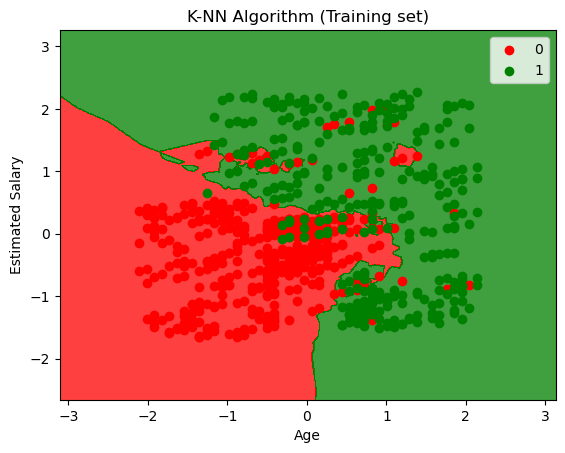

In [7]:
#Visulaizing the trianing set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red','green' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('red', 'green'))(i), label = j)  
mtp.title('K-NN Algorithm (Training set)')  
mtp.xlabel('Age')  
mtp.ylabel('Estimated Salary')  
mtp.legend()  
mtp.show()  

/tmp/ipykernel_33/1394410460.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


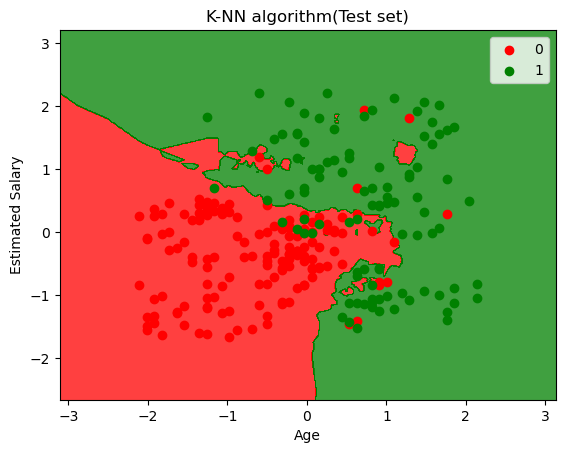

In [8]:
#Visualizing the test set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_test, y_test  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red','green' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('red', 'green'))(i), label = j)  
mtp.title('K-NN algorithm(Test set)')  
mtp.xlabel('Age')  
mtp.ylabel('Estimated Salary')  
mtp.legend()  
mtp.show()  